# PART I

    Part I (15 points)

    We have already studied the ROC curve that represents the performance of a binary classifier. This time you are asked to investigate the Detection Error Trade-off (DET) curve and complete the following tasks:

    * Figure out what DET curve is (what are the axes, what each point on the plot means)
    【A detection error tradeoff (DET) graph is a graphical plot of error rates for binary classification systems, plotting the false rejection rate vs. false acceptance rate. The x- and y-axes are scaled non-linearly by their standard normal deviates (or just by logarithmic transformation), yielding tradeoff curves that are more linear than ROC curves, and use most of the image area to highlight the differences of importance in the critical operating region.】【x-far y-frr】
    
    
    * Figure out what is the metric Equal Error Rate (EER) and it's position on the DET plot
    【Equal error rate (EER) is a biometric security system algorithm used to predetermines the threshold values for its false acceptance rate and its false rejection rate. When the rates are equal, the common value is referred to as the equal error rate. The value indicates that the proportion of false acceptances is equal to the proportion of false rejections. The lower the equal error rate value, the higher the accuracy of the biometric system.】【in the graph where far==frr 】
    
    
    * Using only Numpy and Matplotlib packages write a Python function that takes two input arrays with a binary classifier's predictions and target labels (y_pred and y_test) and does the following:
        a) computes EER
        b) plots DET curve (add axes names and show the position of EER point)
    
    * Use example test_scores.csv file to debug your code (your submission will be tested using similar csv file), where  column 'predicted' == y_pred and 'true_label' == y_test

    查检测误差权衡(DET)曲线并完成以下任务:

    *找出det曲线是什么（轴是什么，绘图上的每个点是什么意思)
    *找出什么是度量等误差率（EER）和它在DET图上的位置
    *仅使用Numpy和Matplotlib包编写一个Python函数，该函数采用带有二进制分类器预测和目标标签（y_pred和y_test）的两个输入数组，并执行以下操作:
        a)计算EER
        b）绘制DET曲线（添加轴名称并显示EER点的位置)

    *使用示例test_scores.csv文件来调试您的代码（您的提交将使用类似的csv文件进行测试），其中列'predicted'==y_pred和'true_label'==y_test

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator


In [26]:
df = pd.read_csv('./test_scores.csv')
df

,predicted,true_label
0,0.665557,1
1,0.641456,1
2,0.298152,0
3,0.237694,0
4,0.357656,0
...,...,...
19995,0.418750,1
19996,0.676707,1
19997,0.610698,1
19998,0.182601,0


In [27]:
df['predicted'] = sorted(df['predicted'])


In [28]:
df

,predicted,true_label
0,0.000000,1
1,0.024247,1
2,0.060345,0
3,0.063811,0
4,0.073856,0
...,...,...
19995,0.923634,1
19996,0.923838,1
19997,0.924418,1
19998,0.930198,0


In [29]:
df['predicted'][2]

0.0603449

In [30]:
len(df)

20000

In [38]:
min_score = min(df['predicted'])
max_score = max(df['predicted'])
step = (max_score - min_score) / 100
step

0.0098652413

In [32]:
def compute_FA(nontarget_is_target, target_is_target):
    #False_accept = nontarget_is_target / (nontarget_is_target + target_is_target)
    FA = float(nontarget_is_target) / (nontarget_is_target + target_is_target)
    return FA

def compute_FR(target_is_nontarget, nontarget_is_nontarget):
    #False_accept = nontarget_is_target / (nontarget_is_target + target_is_target)
    FA = float(target_is_nontarget) / (nontarget_is_nontarget + target_is_nontarget)
    return FA

In [39]:
#对于每一个门限点计算一个 far 和 frr    Calculate a far and frr for each threshold point
threshold_list = []
infos_list = []

for ind in range(1,100):
    target_is_target = 0
    nontarget_is_nontarget = 0
    nontarget_is_target = 0
    target_is_nontarget = 0
    
    threshold = ind * step + min_score # 从min 到 max 20 个 门限
    threshold_list.append(threshold)
    
    small_threshold = []    #predicted
    big_threshold = []      #predicted
    
    _small_threshold = []   #true_label
    _big_threshold = []     #true_label
    
    i = 0
    while i<len(df):
        if df['predicted'][i] > threshold:
            big_threshold.append(df['predicted'][i])
            _big_threshold.append(df['true_label'][i])
        else:
            small_threshold.append(df['predicted'][i])
            _small_threshold.append(df['true_label'][i])
        i+=1
            
    print("big:", len(big_threshold), 'small:', len(small_threshold))
    
    
    #在big_threshold 的数据里确定 target_is_target 和 nontarget_is_target
    
    m = 0
    while m<len(big_threshold):
        if _big_threshold[m] == 1:
            target_is_target += 1
        else:
            nontarget_is_target += 1
        m+=1
    
    n = 0
    while n<len(small_threshold):
        if _small_threshold[n] == 0:
            nontarget_is_nontarget += 1
        else:
            target_is_nontarget += 1
        n+=1
    
    FA = compute_FA(nontarget_is_target, target_is_target)
    FR = compute_FR(target_is_nontarget, nontarget_is_nontarget)
    
    infos_list += [[FA, FR]]
    i = 0
    m = 0
    n = 0


big: 19999 small: 1
big: 19999 small: 1
big: 19998 small: 2
big: 19998 small: 2
big: 19998 small: 2
big: 19998 small: 2
big: 19996 small: 4
big: 19995 small: 5
big: 19987 small: 13
big: 19975 small: 25
big: 19962 small: 38
big: 19945 small: 55
big: 19914 small: 86
big: 19878 small: 122
big: 19819 small: 181
big: 19714 small: 286
big: 19594 small: 406
big: 19447 small: 553
big: 19261 small: 739
big: 19035 small: 965
big: 18735 small: 1265
big: 18381 small: 1619
big: 17974 small: 2026
big: 17497 small: 2503
big: 17012 small: 2988
big: 16480 small: 3520
big: 15931 small: 4069
big: 15359 small: 4641
big: 14763 small: 5237
big: 14253 small: 5747
big: 13717 small: 6283
big: 13232 small: 6768
big: 12735 small: 7265
big: 12352 small: 7648
big: 11942 small: 8058
big: 11611 small: 8389
big: 11280 small: 8720
big: 10996 small: 9004
big: 10770 small: 9230
big: 10567 small: 9433
big: 10378 small: 9622
big: 10208 small: 9792
big: 10062 small: 9938
big: 9918 small: 10082
big: 9762 small: 10238
big: 9

In [41]:
def write_file(filename, lines):
    with open(filename, 'w') as f:
        f.writelines(lines)

In [42]:
result_lines = []
result_path = 'result_infos_eer'

for (threshold, info) in zip(threshold_list, infos_list):
    s = str(threshold) + ' ' + str(info[0]) + ' ' + str(info[1]) + '\n'    # threshold，FA, FR
    result_lines.append(s)
    
write_file(result_path, result_lines)

In [43]:
threshold_list

[0.0098652413,
 0.0197304826,
 0.029595723900000002,
 0.0394609652,
 0.049326206500000004,
 0.059191447800000005,
 0.06905668910000001,
 0.0789219304,
 0.0887871717,
 0.09865241300000001,
 0.10851765430000002,
 0.11838289560000001,
 0.1282481369,
 0.13811337820000003,
 0.14797861950000002,
 0.1578438608,
 0.1677091021,
 0.1775743434,
 0.18743958470000002,
 0.19730482600000002,
 0.2071700673,
 0.21703530860000003,
 0.22690054990000003,
 0.23676579120000002,
 0.2466310325,
 0.2564962738,
 0.2663615151,
 0.27622675640000005,
 0.28609199770000004,
 0.29595723900000004,
 0.30582248030000003,
 0.3156877216,
 0.3255529629,
 0.3354182042,
 0.3452834455,
 0.3551486868,
 0.36501392810000005,
 0.37487916940000005,
 0.38474441070000004,
 0.39460965200000003,
 0.4044748933,
 0.4143401346,
 0.4242053759,
 0.43407061720000006,
 0.44393585850000006,
 0.45380109980000005,
 0.46366634110000005,
 0.47353158240000004,
 0.48339682370000003,
 0.493262065,
 0.5031273063,
 0.5129925476,
 0.5228577889,
 0.5327

min_x: 0.0098652413 max_x: 0.9766588887000001


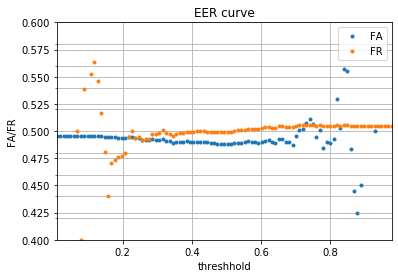

In [53]:
#!coding=utf-8

def read_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    return lines
result_infos_path = 'result_infos_eer'
far_s = []
frr_s = []
threshholds = []
results_info_lines = read_file(result_infos_path)

for line in results_info_lines:
    splits = line.strip().split(' ')
    threshhold, far, frr = splits
    threshholds.append(eval(threshhold))   #eval 评估
    far_s.append(eval(far))
    frr_s.append(eval(frr))

max_x = max(threshholds)
min_x = min(threshholds)
print("min_x:", min_x, "max_x:", max_x)

# 图例 with legend
fig, ax = plt.subplots()
plt.title("EER curve")

plt.xlabel('threshhold')
plt.ylabel('FA/FR')
yminorLocator = MultipleLocator(0.02) #设置y轴的精度
ax.yaxis.set_minor_locator(yminorLocator) #设置次刻度线

"""set min and max value for axes"""
ax.set_ylim([0.40, 0.60])
ax.set_xlim([min_x, max_x])
ax.yaxis.grid(yminorLocator)

ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor')
plt.plot(threshholds, far_s,  '.' , label="FA")
plt.plot(threshholds, frr_s, '.', label="FR")
plt.legend(loc='upper right')

plt.show()# show the plot on the screen

# PART II

In [25]:
#use parameters    criterion = 'entropy', min_points_in_leaf = 2（min_samples_leaf=2？）

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
import graphviz

In [2]:
#将数据写入csv文件

Weather = ['Foggy', 'Cloudy', 'Sunny', 'Sunny', 'Foggy', 'Cloudy', 'Foggy', 'Foggy']
Rain = ['Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No']
Temperature = [16, 13, 18, 14, 13, 16, 16, 18]
Walk = ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']

df = pd.DataFrame({'Weather':Weather, 'Rain':Rain, 'Temperature':Temperature, 'Walk':Walk})
df.to_csv('data.csv', index=False)

In [3]:
data = pd.read_csv('./data.csv')
data

,Weather,Rain,Temperature,Walk
0,Foggy,Yes,16,Yes
1,Cloudy,No,13,No
2,Sunny,No,18,Yes
3,Sunny,No,14,No
4,Foggy,No,13,No
5,Cloudy,Yes,16,Yes
6,Foggy,No,16,No
7,Foggy,No,18,Yes


In [4]:
#将分类变量转换为数值型变量  Convert categorical variables to numeric variables

In [5]:
labels_weather = data['Weather'].unique().tolist()
labels_weather

['Foggy', 'Cloudy', 'Sunny']

In [6]:
data['Weather'] = data['Weather'].apply(lambda x:labels_weather.index(x))
data['Weather']

0    0
1    1
2    2
3    2
4    0
5    1
6    0
7    0
Name: Weather, dtype: int64

In [7]:
labels_rain = data['Rain'].unique().tolist()
labels_rain

['Yes', 'No']

In [8]:
data['Rain'] = (data['Rain']=='Yes').astype('int')
data['Rain']

0    1
1    0
2    0
3    0
4    0
5    1
6    0
7    0
Name: Rain, dtype: int64

In [9]:
data['Walk'] = (data['Walk']=='Yes').astype('int')
data['Walk']

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
Name: Walk, dtype: int64

In [10]:
data

,Weather,Rain,Temperature,Walk
0,0,1,16,1
1,1,0,13,0
2,2,0,18,1
3,2,0,14,0
4,0,0,13,0
5,1,1,16,1
6,0,0,16,0
7,0,0,18,1


In [11]:
#数据集划分  Data set division

In [12]:
x = data.iloc[:,data.columns !='Walk'] 
x

,Weather,Rain,Temperature
0,0,1,16
1,1,0,13
2,2,0,18
3,2,0,14
4,0,0,13
5,1,1,16
6,0,0,16
7,0,0,18


In [13]:
y = data.iloc[:,data.columns =='Walk'] 
y

,Walk
0,1
1,0
2,1
3,0
4,0
5,1
6,0
7,1


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [15]:
for i in [x_train,x_test,y_train,y_test]:
    i.index = range(i.shape[0])
    #规范索引  Canonical Index

In [16]:
x_train

,Weather,Rain,Temperature
0,0,0,13
1,0,0,16
2,0,1,16
3,1,1,16
4,1,0,13


In [17]:
#训练模型 Training model

In [18]:
clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=2)
clf = clf.fit(x_train,y_train)  
score = clf.score(x_test,y_test) #返回预测的准确度accuracy

score

0.3333333333333333

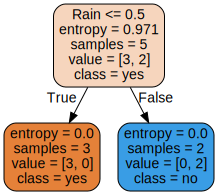

In [19]:
#画图 Drawing
feature_name = ['Weather', 'Rain', 'Temperature']
dot_data = tree.export_graphviz(clf
                                ,feature_names =  feature_name
                                ,class_names=['yes','no']
                                ,filled=True #树的颜色
                                ,rounded=True #框圆
)

graph = graphviz.Source(dot_data)
graph

In [20]:
# clf = tree.DecisionTreeClassifier(random_state =25)
# clf = clf.fit(x_train,y_train)
# score = clf.score(x_test,y_test)
# score

In [21]:
# #使用交叉验证
# clf2 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=2)
# score = cross_val_score(clf2,x,y,cv=3).mean()

# score

0.7222222222222222

In [23]:
# #调参 画学习曲线

# tr = []
# te = []

# for i in range(10):
#     clf = tree.DecisionTreeClassifier(random_state=25
#                                  ,max_depth=i+1
#                                  ,criterion='entropy'
#                                 )
#     clf = clf.fit(x_train,y_train)
#     score_tr = clf.score(x_train,y_train)
#     score_te = cross_val_score(clf,x,y,cv=3).mean()
    
#     tr.append(score_tr)
#     te.append(score_te)

# print(max(te))

In [24]:
# #网格搜索
# import numpy as np 
# gini_threholds = np.linspace(0,0.5,50)   #gini系数的取值是0-0.5
# #entropy_threholds = np.linspace(0,1,50) entropy是0-1


# # parameters : 是一串参数和这些参数对应的，我们希望网格搜索来搜索的参数的取值范围

# # parameters : 
# parameters = {'criterion':('gini','entropy')
#               ,'splitter':('best','random')
#               ,'max_depth':[*range(1,10)]               # 刚刚测的是最好是3
#               ,'min_samples_leaf':[*range(1,50,5)]      # 1-50的范围步长5
#               ,'min_impurity_decrease':[*np.linspace(0,0.5,50)]
              
# # min_impurity_decrease 信息增益最小值，当信息增益小于这个值的时候，决策树的这个节点将不再分枝，
# #这个参数很难界定，每个树，每个节点都不一样，min_impurity_decrease一般在网格搜索会使用到
     
# }

# clf = DecisionTreeClassifier(random_state=25)
# GS = GridSearchCV(clf,parameters,cv=10)       # GridSearchCV同时满足fit score 交叉验证 三个功能
# GS = GS.fit(xtrain,ytrain)


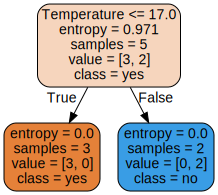

In [36]:
# #画图
# feature_name = ['Weather', 'Rain', 'Temperature']
# dot_data = tree.export_graphviz(clf
#                                 ,feature_names =  feature_name
#                                 ,class_names=['yes','no']
#                                 ,filled=True #树的颜色
#                                 ,rounded=True #框圆
# )

# graph = graphviz.Source(dot_data)
# graph